In [193]:
import pandas as pd
import glob
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from datetime import datetime as dt
import unidecode

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

plt.style.use('seaborn')
# os.chdir("data")

In [76]:
file = 'reddit-original-omega-red/comments.csv'
df = pd.read_csv(file, names = ['Text', 'ID', 'Subreddit', 'meta', 'Time', 'Username', 'Upvotes', 'Downvotes', 'Author_link_karma', 'Author_Comment_Karma','Author_has_gold?'], parse_dates =True)


In [113]:
df_threads = pd.read_csv('reddit-original-omega-red/threads.csv')
df_threads

,Unnamed: 0,"support a 100 % people-funded , nonpartisan online news source by sibel edmonds ( kickstarter )",https://www.kickstarter.com/projects/141490519/support-a-100-people-funded-nonpartisan-online-new?ref=project_tweet,4606mr,libertarian,news,1455588273,TheNiceSociopath,7,0,339,571,0.1
0,NaN,"hillary clinton is losing faith in her "" latin...",http://www.vox.com/2016/2/16/11014922/nevada-c...,462n8i,politics,news,1455632702,dnzvdo,1533,0,6426.0,3.0,0.0
1,NaN,"step by step , pot-legalizing states free thei...",http://reason.com/archives/2016/02/16/step-by-...,4627gv,libertarian,news,1455625403,ghostofpennwast,55,0,231424.0,80539.0,1.0
2,NaN,twitter shadowbanning ‘ real and happening eve...,http://www.breitbart.com/tech/2016/02/16/exclu...,4663o6,libertarian,news,1455677074,PCisLame,3,0,39110.0,-100.0,0.0
3,NaN,/r/facepalm thinks national socialism is not s...,https://www.reddit.com/r/facepalm/comments/462...,463uel,libertarian,news,1455647667,RubberDong,0,0,11202.0,222528.0,0.0
4,NaN,"faced with a budget crunch , isis is killing p...",http://www.nzherald.co.nz/world/news/article.c...,464lhm,worldnews,news,1455656820,poik12,7,0,4344.0,11947.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265994,NaN,i when into a minecart while flying with the e...,http://imgur.com/a/T3SoV,463iot,minecraft,gaming,1455643719,Empoleon4625,3,0,62.0,250.0,0.0
265995,NaN,i made a baby minecraft,http://i.imgur.com/iq4oT89.png,46677p,minecraft,gaming,1455678410,TalkyAttorney,0,0,312.0,908.0,0.0
265996,NaN,so a friend and i have been working on a proje...,http://imgur.com/a/6bgTV,45xyxx,minecraft,gaming,1455561955,Thanorpheus,191,0,2590.0,5222.0,1.0
265997,NaN,my idea was added to minecraft !,https://www.reddit.com/r/minecraftsuggestions/...,4657t6,minecraft,gaming,1455664605,AJVenom123,1,0,1092.0,388.0,0.0


In [80]:
df2 = df.copy()

In [85]:
df2 = df2.dropna(axis =0)

In [108]:
df_test = df2.copy()

In [112]:


# df_test.Time = df_test.Time.apply(lambda x: datetime.fromtimestamp(x))

df_test



,Text,ID,Subreddit,meta,Time,Username,Upvotes,Downvotes,Author_link_karma,Author_Comment_Karma,Author_has_gold?
4,disclaimer : i think obama should nominate som...,d028c5d,politics,news,2016-02-16 13:25:06,degausse,3.0,0.0,1.0,1941.0,0.0
6,either way the process will be dragged out unt...,d026od6,politics,news,2016-02-16 12:47:45,cyberspyder,5.0,0.0,1300.0,6462.0,1.0
7,republicans have always battled with severe ca...,d026wk3,politics,news,2016-02-16 12:52:49,jabb0,15.0,0.0,44981.0,141501.0,0.0
8,politics were so different back then. people o...,d02a3k3,politics,news,2016-02-16 14:04:12,Hypertension123456,2.0,0.0,46.0,42036.0,0.0
9,"equally ridiculous , here 's a 1970 law review...",d025wad,politics,news,2016-02-16 12:30:13,trash_reason,26.0,0.0,5613.0,1361.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2725995,for those with a woefully bad sense of directi...,d02c1s1,minecraft,gaming,2016-02-16 14:46:51,capfan67,2.0,0.0,178.0,2518.0,0.0
2725996,the characters hand in first person is invisib...,464kj4,minecraft,gaming,2016-02-16 15:01:34,CookiezFort,0.0,0.0,833.0,3248.0,0.0
2725997,i guess either the shaders use some feature th...,d02cxvk,minecraft,gaming,2016-02-16 15:06:52,Huntron,1.0,0.0,5534.0,3062.0,1.0
2725998,my guess is that you 're trying to use a brand...,d02ic1n,minecraft,gaming,2016-02-16 17:11:31,nothingl_,1.0,0.0,104.0,807.0,0.0


In [39]:
# Use glob to combine all the csvs in the folder into one usable dataframe
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames], sort=False)
#export to csv


In [116]:
punctuations = '''.!=()[]{};:'"|\<>/?@#$%^&*_~'''
replace = '\n'


lst = []
for i in df_test.Text.values:
    no_punct = ""
#     if len(i) > 15:
#         continue
    for char in i:
        if char in replace:
            char = " "
        if char not in punctuations:
           no_punct = f'{no_punct + char }'
  
        
    lst.append(no_punct)


AttributeError: can't set attribute

In [118]:
df_test.Text = lst
df_test

,Text,ID,Subreddit,meta,Time,Username,Upvotes,Downvotes,Author_link_karma,Author_Comment_Karma,Author_has_gold?
4,disclaimer i think obama should nominate some...,d028c5d,politics,news,2016-02-16 13:25:06,degausse,3.0,0.0,1.0,1941.0,0.0
6,either way the process will be dragged out unt...,d026od6,politics,news,2016-02-16 12:47:45,cyberspyder,5.0,0.0,1300.0,6462.0,1.0
7,republicans have always battled with severe ca...,d026wk3,politics,news,2016-02-16 12:52:49,jabb0,15.0,0.0,44981.0,141501.0,0.0
8,politics were so different back then people on...,d02a3k3,politics,news,2016-02-16 14:04:12,Hypertension123456,2.0,0.0,46.0,42036.0,0.0
9,"equally ridiculous , here s a 1970 law review ...",d025wad,politics,news,2016-02-16 12:30:13,trash_reason,26.0,0.0,5613.0,1361.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2725995,for those with a woefully bad sense of directi...,d02c1s1,minecraft,gaming,2016-02-16 14:46:51,capfan67,2.0,0.0,178.0,2518.0,0.0
2725996,the characters hand in first person is invisib...,464kj4,minecraft,gaming,2016-02-16 15:01:34,CookiezFort,0.0,0.0,833.0,3248.0,0.0
2725997,i guess either the shaders use some feature th...,d02cxvk,minecraft,gaming,2016-02-16 15:06:52,Huntron,1.0,0.0,5534.0,3062.0,1.0
2725998,my guess is that you re trying to use a brand ...,d02ic1n,minecraft,gaming,2016-02-16 17:11:31,nothingl_,1.0,0.0,104.0,807.0,0.0


In [123]:
s_stop = set(stopwords.words())
new_stops = ['2015ref','publisherspage190ref','volume9', 'issue2', 'page7','logo.png','2015.ref', 'nameleaf200kcit','ref', '005.jpgthumbrightth', 'whose', 'kind','png', 'jpg', 'wiktionaryzero', 'wiktionaryzero0', 'wiktionaryzero0', 'articlesquantum','0supsup', '0refcit', '1-3', 'redirectzero', '.', ',', 'nameleaf200k2cit', 'wiktionari', 'namecarb01cit','-', 'filezero', 'mvaramvarxmvari', 'page98','datemfyes1915228', 'year1989ref', '1671.jpgthumbemerg', 'refimprovedatemay','ligatureligatur', 'pppc1expiry2144', 'wiktionary','wiktionary0', 'n','improvedateoctob' ]
for i in new_stops:
    s_stop.add(i)
len(s_stop)
new_stop = s_stop
len(new_stops)

41

In [132]:
lst_stems = []
for i in df_test.Text:
    i = i.lower()
    i = unidecode.unidecode(i)
    l_s = sent_tokenize(i)
#     print("Sentence Tokens:\n",l_s[:2])

    tokens = list(map(word_tokenize, l_s))
#     print("\nWord Tokens:\n", tokens[:2])

    
    tokens_stop_free = [[word for word in sent if word not in new_stop] for sent in tokens]
#     print("\nNo stop word tokens:\n", tokens_stop_free[:2])

    st = SnowballStemmer(language = 'english')
    stems = [[st.stem(word) for word in sent] for sent in tokens_stop_free]
    try:
        stems_no_dupes = (stems[0])
    except:
        stems_no_dupes = stems
#     break
#     print("\nNo stop word tokens:\n", stems[:2])
    lst_stems.append(" ".join(stems_no_dupes))
stems_no_dupes

['run',
 '18',
 'server',
 'ever',
 'sinc',
 '16',
 'server',
 'skip',
 'everi',
 'half-second',
 'game',
 'mean',
 'everyon',
 'play',
 'skip',
 'mild',
 'frustrat',
 'server',
 'window',
 'skip',
 'drag',
 'around',
 'desktop',
 'hard',
 'explain',
 'exact',
 'what',
 'happen',
 'wonder',
 'anyon',
 'solut',
 'experienc',
 'search',
 'googl',
 'noth',
 'exact',
 'match',
 'problem']

In [134]:
df_test_snowball = df_test.copy()
df_test.Text = lst_stems
df_test

,Text,ID,Subreddit,meta,Time,Username,Upvotes,Downvotes,Author_link_karma,Author_Comment_Karma,Author_has_gold?
4,disclaim think obama nomin someon senat hold c...,d028c5d,politics,news,2016-02-16 13:25:06,degausse,3.0,0.0,1.0,1941.0,0.0
6,either way process drag elect gop vote senat s...,d026od6,politics,news,2016-02-16 12:47:45,cyberspyder,5.0,0.0,1300.0,6462.0,1.0
7,republican alway battl sever case select amnesia,d026wk3,politics,news,2016-02-16 12:52:49,jabb0,15.0,0.0,44981.0,141501.0,0.0
8,polit differ back peopl side least pretend rea...,d02a3k3,politics,news,2016-02-16 14:04:12,Hypertension123456,2.0,0.0,46.0,42036.0,0.0
9,equal ridicul 1970 law review articl mcconnel ...,d025wad,politics,news,2016-02-16 12:30:13,trash_reason,26.0,0.0,5613.0,1361.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2725995,woefulli bad sens direct use advic hand time p...,d02c1s1,minecraft,gaming,2016-02-16 14:46:51,capfan67,2.0,0.0,178.0,2518.0,0.0
2725996,charact hand first person invis look glitchi u...,464kj4,minecraft,gaming,2016-02-16 15:01:34,CookiezFort,0.0,0.0,833.0,3248.0,0.0
2725997,guess either shader use featur ad 18 glsl vers...,d02cxvk,minecraft,gaming,2016-02-16 15:06:52,Huntron,1.0,0.0,5534.0,3062.0,1.0
2725998,guess tri use brand spank new graphic driver n...,d02ic1n,minecraft,gaming,2016-02-16 17:11:31,nothingl_,1.0,0.0,104.0,807.0,0.0


In [135]:
df_test

,Text,ID,Subreddit,meta,Time,Username,Upvotes,Downvotes,Author_link_karma,Author_Comment_Karma,Author_has_gold?
4,disclaim think obama nomin someon senat hold c...,d028c5d,politics,news,2016-02-16 13:25:06,degausse,3.0,0.0,1.0,1941.0,0.0
6,either way process drag elect gop vote senat s...,d026od6,politics,news,2016-02-16 12:47:45,cyberspyder,5.0,0.0,1300.0,6462.0,1.0
7,republican alway battl sever case select amnesia,d026wk3,politics,news,2016-02-16 12:52:49,jabb0,15.0,0.0,44981.0,141501.0,0.0
8,polit differ back peopl side least pretend rea...,d02a3k3,politics,news,2016-02-16 14:04:12,Hypertension123456,2.0,0.0,46.0,42036.0,0.0
9,equal ridicul 1970 law review articl mcconnel ...,d025wad,politics,news,2016-02-16 12:30:13,trash_reason,26.0,0.0,5613.0,1361.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2725995,woefulli bad sens direct use advic hand time p...,d02c1s1,minecraft,gaming,2016-02-16 14:46:51,capfan67,2.0,0.0,178.0,2518.0,0.0
2725996,charact hand first person invis look glitchi u...,464kj4,minecraft,gaming,2016-02-16 15:01:34,CookiezFort,0.0,0.0,833.0,3248.0,0.0
2725997,guess either shader use featur ad 18 glsl vers...,d02cxvk,minecraft,gaming,2016-02-16 15:06:52,Huntron,1.0,0.0,5534.0,3062.0,1.0
2725998,guess tri use brand spank new graphic driver n...,d02ic1n,minecraft,gaming,2016-02-16 17:11:31,nothingl_,1.0,0.0,104.0,807.0,0.0


In [43]:
# combined_csv.drop('Unnamed:0', axis =1)
combined_csv.set_index('Unnamed: 0')

,0,1,2,3,4,5,6,7,8,9,10,11
Unnamed: 0,,,,,,,,,,,,
0,my neighbor has moss on her clitoris,d02ojhe,funny,humor,1.45567e+09,FLGulf,1,0.0,64.0,144312.0,1.0,NaN
1,lettuce not make to many jokes,d02iumx,funny,humor,1.45567e+09,Looksatducks,1,0.0,1.0,48.0,0.0,NaN
2,christopher columbus also sold children as sex...,d02kuqg,funny,humor,1.45567e+09,Malkalack,2,0.0,1478.0,19270.0,0.0,NaN
3,rthathappened,d02uf4u,funny,humor,1.45568e+09,WadeWilsonforPope,-3,0.0,675.0,286907.0,1.0,NaN
4,gt 734 nothing good on huh,d02p7to,funny,humor,1.45567e+09,JoeyFatts,1,0.0,21259.0,23074.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
74754,this explains canadians,d02ahaq,todayilearned,learning,1.45565e+09,RobSwift127,5,0.0,185.0,4553.0,0.0,NaN
74755,also gt high temperatures have a significant...,d029rqb,todayilearned,learning,1.45565e+09,farouqyoshi,1,0.0,28401.0,145.0,0.0,NaN
74756,that explains canada we re too cold and that...,d02qmv6,todayilearned,learning,1.45568e+09,TheRealSilverBlade,1,0.0,796.0,22862.0,0.0,NaN


,Text,ID,Subreddit,meta,Time,Username,Upvotes,Downvotes,Author_link_karma,Author_Comment_Karma,Author_has_gold?
4,disclaimer : i think obama should nominate som...,d028c5d,politics,news,1.455651e+09,degausse,3.0,0.0,1.0,1941.0,0.0
6,either way the process will be dragged out unt...,d026od6,politics,news,1.455648e+09,cyberspyder,5.0,0.0,1300.0,6462.0,1.0
7,republicans have always battled with severe ca...,d026wk3,politics,news,1.455649e+09,jabb0,15.0,0.0,44981.0,141501.0,0.0
8,politics were so different back then. people o...,d02a3k3,politics,news,1.455653e+09,Hypertension123456,2.0,0.0,46.0,42036.0,0.0
9,"equally ridiculous , here 's a 1970 law review...",d025wad,politics,news,1.455647e+09,trash_reason,26.0,0.0,5613.0,1361.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2725995,for those with a woefully bad sense of directi...,d02c1s1,minecraft,gaming,1.455656e+09,capfan67,2.0,0.0,178.0,2518.0,0.0
2725996,the characters hand in first person is invisib...,464kj4,minecraft,gaming,1.455656e+09,CookiezFort,0.0,0.0,833.0,3248.0,0.0
2725997,i guess either the shaders use some feature th...,d02cxvk,minecraft,gaming,1.455657e+09,Huntron,1.0,0.0,5534.0,3062.0,1.0
2725998,my guess is that you 're trying to use a brand...,d02ic1n,minecraft,gaming,1.455664e+09,nothingl_,1.0,0.0,104.0,807.0,0.0


# EDA and Exploratory Graphs

/Users/JamesSkelton/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/JamesSkelton/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, "Histogram of users' link karma, removed outliers")

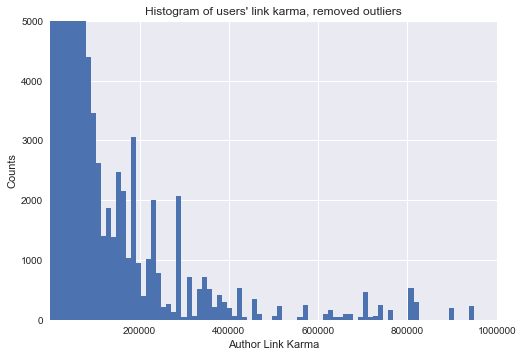

In [194]:
fig, ax = plt.subplots()
plt.hist(df.Author_link_karma, bins = 500)
plt.ylim(0, 5000)
plt.xlim(5,1000000)
ax.set_xlabel('Author Link Karma')
ax.set_ylabel('Counts')
ax.set_title("Histogram of users' link karma, removed outliers")

Text(0.5, 1.0, "Histogram of users' link karma, yscale log")

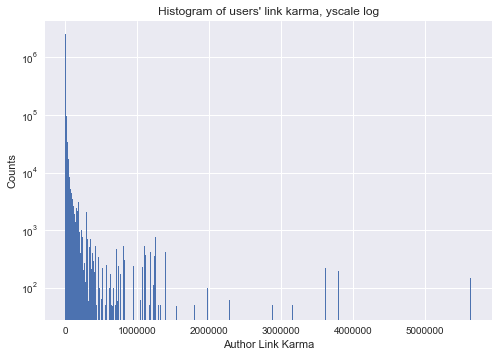

In [195]:
fig, ax = plt.subplots()
plt.hist(df.Author_link_karma, bins = 500)
# plt.ylim(0, 5000)
# plt.xlim(5,1000000)

ax.set_yscale('log')

ax.set_xlabel('Author Link Karma')
ax.set_ylabel('Counts')
ax.set_title("Histogram of users' link karma, yscale log")

Text(0.5, 1.0, "Histogram of users' link karma, outliers removed yscale log")

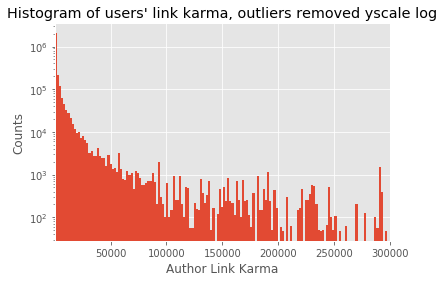

In [160]:
fig, ax = plt.subplots()
plt.hist(df.Author_link_karma, bins = 3000)
# plt.ylim()
plt.xlim(1,300000)

ax.set_yscale('log')

ax.set_xlabel('Author Link Karma')
ax.set_ylabel('Counts')
ax.set_title("Histogram of users' link karma, outliers removed yscale log")

Text(0.5, 1.0, "Histogram of users' comment karma, removed outliers")

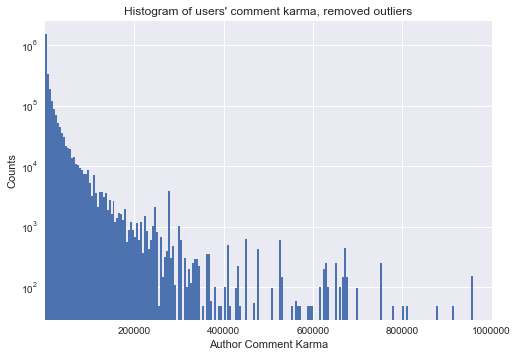

In [204]:
fig, ax = plt.subplots()
plt.hist(df.Author_Comment_Karma, bins = 500)
# plt.ylim(0, 5000)
plt.xlim(1,1000000)

ax.set_yscale('log')
ax.set_xlabel('Author Comment Karma')
ax.set_ylabel('Counts')
ax.set_title("Histogram of users' comment karma, removed outliers")

(0, 1500000)

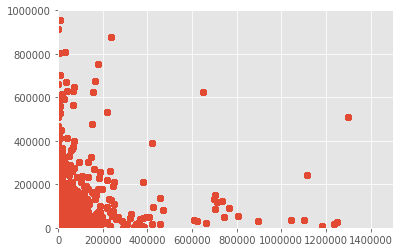

In [167]:
fig, ax = plt.subplots()

plt.scatter(df_test.Author_link_karma, df_test.Author_Comment_Karma)

# ax.set_yscale('')

ax.set_ylim(0, 1000000)
ax.set_xlim(0, 1500000)

Text(0.5, 1.0, 'Histogram of posts per hour of day')

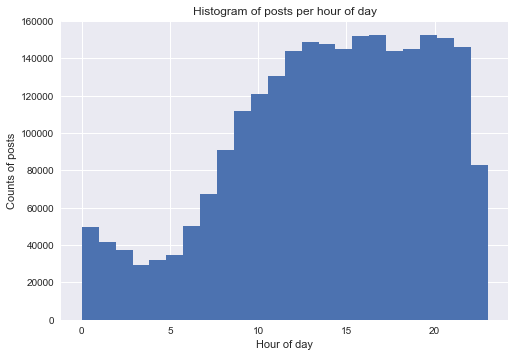

In [192]:
fig, ax = plt.subplots()

plt.hist(df_test.Time.dt.hour, bins = 24)
plt.style.use('seaborn')
ax.set_ylabel('Counts of posts')
ax.set_xlabel('Hour of day')
ax.set_title('Histogram of posts per hour of day')

In [184]:
df_test['Time'].dt.hour

4          13
6          12
7          12
8          14
9          12
           ..
2725995    14
2725996    15
2725997    15
2725998    17
2725999    11
Name: Time, Length: 2506609, dtype: int64